# Particle Swarm Optimization

**Alunos:**

* Eduardo Villani - 2015104008
* Hugo Zanini - 2015016044

---
### Problema


Objetivo: Implementar um algoritmo de Particle Swarm Optimization (PSO), para resolver um problema de otimização não linear irrestrito de variáveis contínuas:

\\[ x^* = argmin_xf(x) \\]

$V_{max}$ -> Velocidade máxima das particulas <br>
$W$ -> Peso de inércia <br>
$C_1$ -> Fator de aprendizagem cognitiva <br>
$C_2$ fator de aprendizagem social <br>

Seja uma população de *N* soluções candidatas na t-ésima iteração:

\\[ X_t = \{x_{t,i}; i = 1,... N \}\\]

Cada indivíduo é representado por um vetor coluna:

\\[x_{t,i} = [x_{t,i,1}, x_{t,i,2}, ..., x_{t,i,j},... ,x_{t,i,n}]^T \\]

em que o terceiro índice indica uma entre as *n* variáveis de decisão do problema.



O algoritmo particle Swarm Optimization, implementado nesse trabalho baseou-se no pseudocódigo a seguir:

---


*1* &nbsp; &nbsp; &nbsp; &nbsp; Iniciar uma nuvem de partóculas de forma aleatória<br>
*2* &nbsp; &nbsp; &nbsp; &nbsp; **Repetir**<br>
*3* &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; **Para** as N particulas<br>
*4* &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; Avaliar $f(x_i)$<br>
*5* &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; Se $f(x_i)$ < $f(pbest_i)$, **então** $pbest_i = x_i$ <br>
*6* &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; $g=min_(p_{vizinhos})$ <br>
*7* &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; **Para** cada dimensão d <br>
*8* &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; Atualizar componente da velocidade $v_{id}$<br>
*9* &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; **Se** $v_{id}$ > $V_{max}$ **então** refletir partícula<br>
*10* &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; **Fim Para** <br>
*11* &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; Deslocar partículas para as suas novas posições $x_{i+1}$ <br>
*12* &nbsp;&nbsp; &nbsp; &nbsp; **Até** satisfazer o critério de parada $x_{i+1}$ <br>

---

### Testes

O algoritmo foi testado em dois problemas multimodais de otimização contínua que serão descritos a seguir.

#### Peaks

A *Peaks* é uma função de duas variáveis obtida pela translação e escalonamento de distribuições Gaussianas, conforme a Figura 1.


<img src="https://www.mathworks.com/help/examples/graphics2/win64/PeaksSurfaceExample_01.png" alt="drawing" width="400"/>
    
\\[  \text{Figura 1. Exemplo de uma Função Peaks} \\]

Nos testes, foram utilizados os seguintes parâmetros

\\[  -3 <=x_1<= 3\\]
\\[  -3 <=x_2<= 3\\]
Mínimo global: 
\\[  x^*= [0.228, -1.625]\\]
\\[  f(x^*) = -6.5511\\] <br>

N = 50

#### Rastrigin

A *Rastrigin* é um exemplo clássico de função multimodal não linear. Ela é não convexa e muito utilizada em testes de performance de algoritmos de otimização. Conforme a Figura 2


<img src="https://www.mathworks.com/help/gads/rastrigins_with_line2.png" alt="drawing" width="400"/>
    
\\[  \text{Figura 2. Exemplo de uma Função Rastrigins} \\]

Nos testes, foram utilizados os seguintes parâmetros

\\[  -2 <=x_1<= 2\\]
\\[  -2 <=x_2<= 2\\]
Mínimo global: 
\\[  x^*= [0, 0]\\]
\\[  f(x^*) = -20\\] <br>

N = 50


### Implementação

A seguir, são apresentados os códigos para a solução do problema. Foram realizados testes com N = 10, 25 e 50 para as funções *Peaks* e *Rastrigin* com N = 50

In [49]:
from __future__ import division
import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [117]:
class PSO:
    def __init__(self, x0):
        self.posicao = []
        self.velocidade = []
        self.melhor_pos = []
        self.melhor_error = -1
        self.error_ind = -1

        for i in range(0, num_dims):
            self.velocidade.append(random.uniform(-1, 1))
            self.posicao.append(x0[i])

    # Analise do fitness atual
    def evaluate(self, my_func):
        self.error_ind = my_func(self.posicao)

        # Verificando se o individuo atual eh o melhor
        if self.error_ind < self.melhor_error or self.melhor_error==-1:
            self.melhor_pos = self.posicao
            self.melhor_error = self.error_ind

    # Atualizacao da velocidade da particula
    def atualizar_velocidade(self, grupo_melhor_pos):
        w = 0.5       # Peso de inercia
        c1 = 1        # Fator de aprendizagem coginitiva
        c2 = 1.2        # Fator de aprendizagem social

        for i in range(0, num_dims):
            r1 = random.random()
            r2 = random.random()

            vel_cognitiva = c1 * r1 * (self.melhor_pos[i] - self.posicao[i])
            vel_social = c2 * r2 * (grupo_melhor_pos[i] - self.posicao[i])
            self.velocidade[i] = w * self.velocidade[i] + vel_cognitiva + vel_social

    # Atualize a posicao da particula com base nas novas velocidades
    def atualizar_posicao(self, limites):
        for i in range(0, num_dims):
            self.posicao[i] = self.posicao[i] + self.velocidade[i]

            # Se necessario, analizar a pos maxima
            if self.posicao[i] > limites[i][1]:
                self.posicao[i] = limites[i][1]

            #Se necessario, atualziar a posicao minima
            if self.posicao[i] < limites[i][0]:
                self.posicao[i] = limites[i][0]


In [118]:
def generate_plot(fitness, best_fitness, fitness_medio, func_nome) -> None:
    plt.plot(list(range(len(fitness))), fitness_medio, '-o', label = 'Fitness médio')
    plt.plot(list(range(len(fitness))), best_fitness, 'o', label = 'Melhor fitness')
    plt.xlabel('Geração')
    plt.ylabel('Valor')
    plt.legend(loc="upper right")
    plt.title('Evolução do fitness médio - ' + func_nome)
    

def run_pso(my_func, func_nome, num_particulas, iter_max, x0, limites):

    global num_dims

    num_dims = len(x0)
    grupo_melhor_error = -1
    grupo_melhor_pos = []
    fitness = []
    best_fitness = []
    fitness_medio = []

    # Criando o swarm
    swarm = []
    for i in range(0, num_particulas):
        swarm.append(PSO(x0))

    i=0
    while i < iter_max:
        # Iterando sobre as particulas e avaliando o fitness
        for j in range(0, num_particulas):
            swarm[j].evaluate(my_func)

            # Determinando se a particula eh a melhor globalmente
            if swarm[j].error_ind < grupo_melhor_error or grupo_melhor_error == -1:
                grupo_melhor_pos = list(swarm[j].posicao)
                grupo_melhor_error = float(swarm[j].error_ind)

                fitness.append(swarm[j].error_ind)
                best_fitness.append(grupo_melhor_error)
                fitness_medio.append(sum(fitness)/len(fitness))

        # Iterando no enxame e atualizando as velocidades
        for j in range(0, num_particulas):
            swarm[j].atualizar_velocidade(grupo_melhor_pos)
            swarm[j].atualizar_posicao(limites)
        i+=1

    generate_plot(fitness, best_fitness, fitness_medio, func_nome)

## Peaks

In [80]:
def peaks(x):
    y = x[1]
    x = x[0]
    exp_1 = 3 * (1 - x) ** 2 * np.exp(- (x ** 2) - (y + 1) ** 2)
    exp_2 = 10 * (x / 5 - x ** 3 - y ** 5) * np.exp(-(x ** 2) - (y ** 2))
    exp_3 = (1 / 3) * np.exp(-(x + 1) ** 2 - (y ** 2))
    return exp_1 - exp_2 - exp_3

axis_ranges =[-3,3]
limites=[(-3,3),(-3,3)]

#### N = 10 e MAX = 50

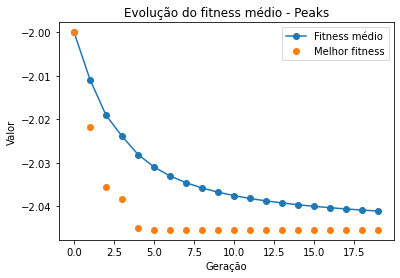

In [104]:
run_pso(my_func = rastrigin,
    func_nome = 'Peaks',
    x0 = axis_ranges,
    limites = limites,
    num_particulas=10,
    iter_max=50)

#### N = 25 e MAX = 50

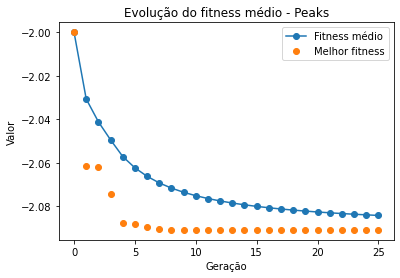

In [101]:
run_pso(my_func = rastrigin,
    func_nome = 'Peaks',
    x0 = axis_ranges,
    limites = limites,
    num_particulas=25,
    iter_max=50)

#### N = 50 e MAX = 50

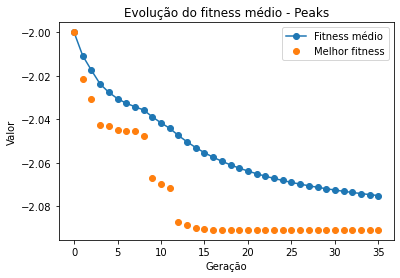

In [100]:
run_pso(my_func = rastrigin,
    func_nome = 'Peaks',
    x0 = axis_ranges,
    limites = limites,
    num_particulas=50,
    iter_max=50)

## Rastrigin 

In [108]:
def rastrigin(x):
    Q = np.identity(len(x))
    X = Q @ x
    n = len(x)
    F = 0

    for i in range(n):
        F = F + X[i] ** 2 - 10 * np.cos(2 * np.pi * X[i])
    return F

axis_ranges =[-2,2]
limites=[(-2,2),(-2,2)]

### N = 10 e MAX = 50

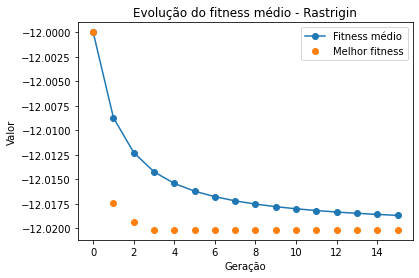

In [109]:
run_pso(my_func = rastrigin,
    func_nome = 'Rastrigin',
    x0 = axis_ranges,
    limites = limites,
    num_particulas=10,
    iter_max=50)

### N = 25 e MAX = 50

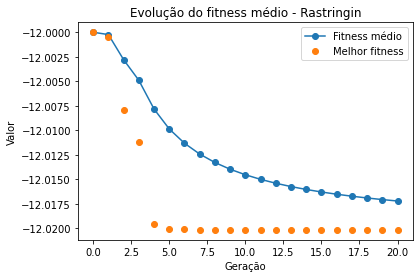

In [115]:
run_pso(my_func = rastrigin,
    func_nome = 'Rastringin',
    x0 = axis_ranges,
    limites = limites,
    num_particulas=25,
    iter_max=50)

### N = 50 e MAX = 50

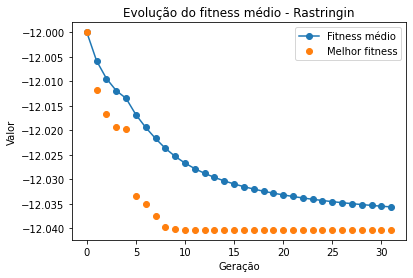

In [116]:
run_pso(my_func = rastrigin,
    func_nome = 'Rastringin',
    x0 = axis_ranges,
    limites = limites,
    num_particulas=50,
    iter_max=50)